In [1]:
import seaborn as sns
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt

## Warming up replacement, training time

In [2]:
no_warm_up_full_pretrain_perf = []

with open("../50_episodes_1_9/run_1/full_pretrain_performances.json", "r") as full_pretrain_perf_file:
    no_warm_up_full_pretrain_perf.extend(json.load(full_pretrain_perf_file))
    
warm_up_full_scratch_perf = []
    
with open("../50_episodes_1_9/run_1/full_scratch_performances.json", "r") as full_scratch_perf_file:
    warm_up_full_scratch_perf.extend(json.load(full_scratch_perf_file))
    
print(len(no_warm_up_full_pretrain_perf))
print(len(warm_up_full_scratch_perf))

150
200


In [3]:
no_warm_up_full_pretrain_mean = []
warm_up_full_scratch_mean = []

for i in range(95):
    no_warm_up_full_pretrain_mean.append([no_warm_up_full_pretrain_perf[i][str(j)] for j in range(50)])
    warm_up_full_scratch_mean.append([warm_up_full_scratch_perf[i][str(j)] for j in range(50)])

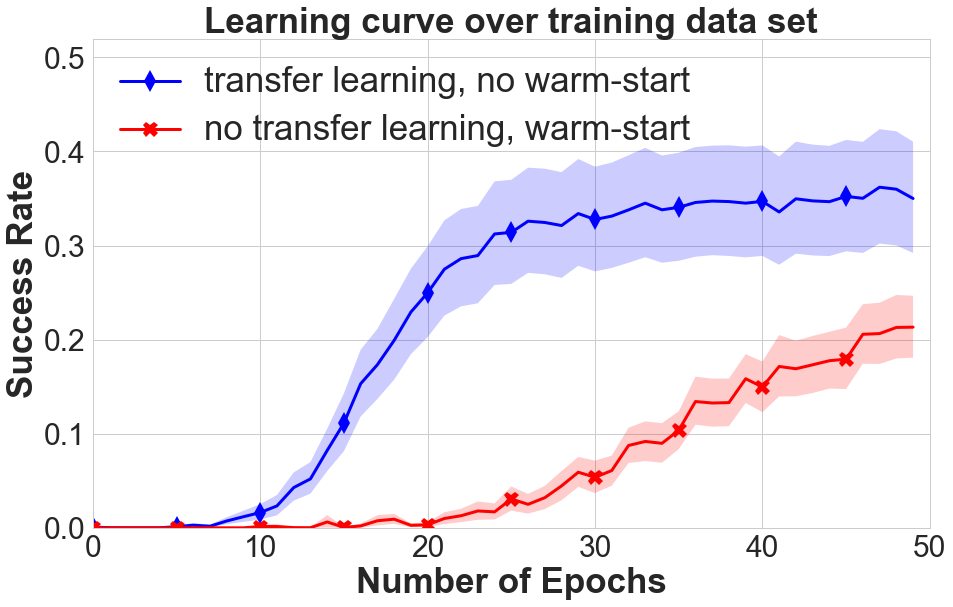

In [4]:
plt.figure(figsize=(15, 9))
sns.set(font_scale=3)
sns.set_style("whitegrid")


data = np.asarray(no_warm_up_full_pretrain_mean)
ax = sns.tsplot(data=data,  ci=[85], color='blue', marker='d', markersize=15, markevery=5, linewidth=3.0, legend=True, condition="transfer learning, no warm-start")

data = np.asarray(warm_up_full_scratch_mean)
ax = sns.tsplot(data=data,  ci=[85], color='red', marker='X', markersize=15, markevery=5, linewidth=3.0, legend=True, condition="no transfer learning, warm-start")


ax.set_xlabel('Number of Epochs', weight='bold', size=35)
ax.set_ylabel('Success Rate', weight='bold', size=35)
sns.plt.title('Learning curve over training data set', weight='bold', size=35)
ax.legend(loc='upper left')
          
plt.xlim((0, 50))
plt.ylim((0, 0.52))
plt.setp(ax.get_legend().get_texts(), fontsize="35")
plt.savefig('learning_curve_training_data_set_200_reps_color.png', dpi=200, bbox_inches="tight", pad_inches=0)
plt.show()

## Warming up replacement, testing time

In [5]:
no_warm_up_full_pretrain_test_perf = []

with open("../50_episodes_1_9/run_1/full_pretrain_test_performances.json", "r") as full_pretrain_test_perf_file:
    no_warm_up_full_pretrain_test_perf.extend(json.load(full_pretrain_test_perf_file))
    
warm_up_full_scratch_test_perf = []
    
with open("../50_episodes_1_9/run_1/full_scratch_test_performances.json", "r") as full_scratch_test_perf_file:
    warm_up_full_scratch_test_perf.extend(json.load(full_scratch_test_perf_file))
    
print(len(no_warm_up_full_pretrain_test_perf))
print(len(warm_up_full_scratch_test_perf))

150
200


In [6]:
no_warm_up_full_pretrain_test_mean = []
warm_up_full_scratch_test_mean = []

for i in range(95):
    no_warm_up_full_pretrain_test_mean.append([no_warm_up_full_pretrain_test_perf[i][str(j)] for j in range(50)])
    warm_up_full_scratch_test_mean.append([warm_up_full_scratch_test_perf[i][str(j)] for j in range(50)])

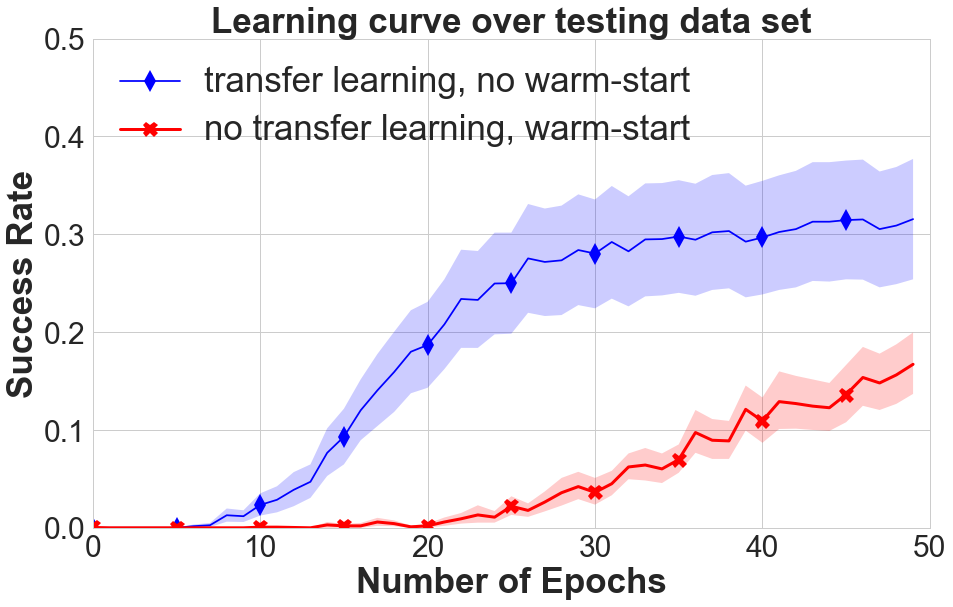

In [7]:
plt.figure(figsize=(15, 9))
sns.set(font_scale=3)
sns.set_style("whitegrid")


data = np.asarray(no_warm_up_full_pretrain_test_mean)
ax = sns.tsplot(data=data,  ci=[85], color='blue', marker='d', markersize=15, markevery=5, legend=True, condition="transfer learning, no warm-start")

data = np.asarray(warm_up_full_scratch_test_mean)
ax = sns.tsplot(data=data,  ci=[85], color='red', marker='X', markersize=15, markevery=5, linewidth=3.0, legend=True, condition="no transfer learning, warm-start")

ax.set_xlabel('Number of Epochs', weight='bold', size=35)
ax.set_ylabel('Success Rate', weight='bold', size=35)
sns.plt.title('Learning curve over testing data set', weight='bold', size=35)
ax.legend(loc='upper left')

plt.xlim((0,50))
plt.ylim((0, 0.5))
plt.setp(ax.get_legend().get_texts(), fontsize="35")
plt.savefig('learning_curve_testing_data_set_200_reps_color.png', dpi=200, bbox_inches="tight", pad_inches=0)
plt.show()